Problem Statement :
    You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

Variables in the Dataset :
●	age (numeric)
●	job : type of job
●	marital : marital status
●	educational_qual : education status
●	call_type : contact communication type
●	day: last contact day of the month (numeric)
●	mon: last contact month of year
●	dur: last contact duration, in seconds (numeric)
●	num_calls: number of contacts performed during this campaign and for this client 
●	prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Output variable (desired target):
●	y - has the client subscribed to the insurance?


Basic Analysis of Dataset from Problem Statement and Features:

It is a supervised learning problem - We are predicting target variable
From target varible we can clearly understand it is a classification problem
From target variable we can tell it is a binary classification problem. target = (y/n)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
# Checking size of dataset
df.shape

(45211, 11)

From the above result no of rows are 45211 and no of columns are 11

# Data Cleaning

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure that it is ready for analysis. It involves tasks such as handling missing or duplicate data, correcting data types, and removing outliers or irrelevant information.

In [5]:
#finding the column names
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
# Checking Data Type
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
# checking null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
#checking duplicate vaues
df.duplicated().sum()


6

In [9]:
#drop the duplicate values
df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(45205, 11)

Unique Values of Categorical Column

In [12]:
df.dtypes.value_counts()

object    7
int64     4
dtype: int64

# Age -Continuous data

In [13]:
df['age'].describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [14]:
# treat outliers
q3=df['age'].quantile(0.75)
q1=df['age'].quantile(0.25)

iqr=q3-q1

upper_threshold=q3+(1.5*iqr)
lower_threshold=q1-(1.5*iqr)
upper_threshold,lower_threshold

(70.5, 10.5)

In [15]:
df['age'] = df['age'].clip(10, 70)

In [16]:
df['age'].describe()

count    45205.000000
mean        40.863666
std         10.380009
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

#  job- Categorical data -Multiclass Classification

In [17]:

df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
#finding percetange of unknown values
print('percentange of unknown values:',((288)/(45205))*100)

percentange of unknown values: 0.6370976661873686


In [20]:
df.loc[df['job'] == 'unknown']


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
216,47,unknown,married,unknown,unknown,5,may,338,2,unknown,no
354,59,unknown,divorced,unknown,unknown,5,may,347,3,unknown,no
876,37,unknown,single,unknown,unknown,7,may,131,1,unknown,no
1072,29,unknown,single,primary,unknown,7,may,50,2,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,cellular,7,sep,314,1,unknown,yes
44742,64,unknown,married,unknown,telephone,9,sep,378,4,unknown,no
44970,28,unknown,single,unknown,cellular,11,oct,450,1,success,yes
45141,70,unknown,married,unknown,telephone,8,nov,207,1,success,no


# marital -Multiclass Classification Categorical data

In [21]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

# Education_qual-Multiclass Classification Categorical data

In [22]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [23]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [24]:
# df.loc[df['education_qual']=='unknown','education_qual']

In [25]:
#finding percetange of unknown values
print('percentange of unknown values:',((1857)/(45205))*100)

percentange of unknown values: 4.107952660103971


lets impute the unknown equcation records with job 


In [26]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [27]:
blue_collar= df.loc[df['job'] == 'blue-collar', 'education_qual']
blue_collar.value_counts()

secondary    5370
primary      3757
unknown       454
tertiary      149
Name: education_qual, dtype: int64

In [28]:
management= df.loc[df['job'] == 'management', 'education_qual']
management.value_counts()

tertiary     7800
secondary    1121
primary       294
unknown       242
Name: education_qual, dtype: int64

In [29]:
technician=df.loc[df['job']=='technician','education_qual']
technician.value_counts()

secondary    5229
tertiary     1967
unknown       242
primary       158
Name: education_qual, dtype: int64

In [30]:
entrepreneur=df.loc[df['job']=='entrepreneur','education_qual']
entrepreneur.value_counts()

tertiary     686
secondary    542
primary      183
unknown       76
Name: education_qual, dtype: int64

In [31]:
retired=df.loc[df['job']=='retired','education_qual']
retired.value_counts()

secondary    984
primary      795
tertiary     366
unknown      119
Name: education_qual, dtype: int64

In [32]:
services=df.loc[df['job']=='services','education_qual']
services.value_counts()

secondary    3456
primary       345
tertiary      202
unknown       150
Name: education_qual, dtype: int64

In [33]:
self_employed=df.loc[df['job']=='self-employed','education_qual']
self_employed.value_counts()

tertiary     833
secondary    577
primary      130
unknown       39
Name: education_qual, dtype: int64

In [34]:
unemployed=df.loc[df['job']=='unemployed','education_qual']
unemployed.value_counts()

secondary    728
tertiary     289
primary      257
unknown       29
Name: education_qual, dtype: int64

In [35]:
housemaid= df.loc[df['job']=='housemaid','education_qual']
housemaid.value_counts()

primary      627
secondary    395
tertiary     173
unknown       45
Name: education_qual, dtype: int64

In [36]:
student=df.loc[df['job']=='student','education_qual']
student.value_counts()

secondary    508
tertiary     223
unknown      163
primary       44
Name: education_qual, dtype: int64

lets impute the education_qualification 'unknown' values as per below 

technician,services, =  secondary
management,self-employed ,entrepreneur= tertiary
retired,student = secondary,
housemaid,blue-collar=primary
unemployed=secondary

In [37]:
df.loc[((df['job'] == 'blue-collar')|(df['job'] == 'housemaid')) & (df['education_qual'] == 'unknown'), 'education_qual'] = 'primary'
df.loc[((df['job'] == 'technician') | (df['job'] == 'services')) & (df['education_qual'] == 'unknown'), 'education_qual'] = 'secondary'
df.loc[((df['job'] == 'management') | (df['job'] == 'self-employed') | (df['job'] == 'entrepreneur')) & (df['education_qual'] == 'unknown'), 'education_qual'] = 'tertiary'
df.loc[((df['job'] == 'retired') | (df['job'] == 'student') | (df['job'] == 'unemployed')) & (df['education_qual'] == 'unknown'), 'education_qual'] = 'secondary'


In [38]:
df['education_qual'].value_counts()

secondary    23902
tertiary     13656
primary       7349
unknown        298
Name: education_qual, dtype: int64

In [39]:
unknown_educat_df =df[(df['education_qual'] == 'unknown') & (df['y']=='yes')]
len(unknown_educat_df)

36

In [40]:
#finding percetange of unknown values
print('percentange of unknown values:',((298)/(45205))*100)

percentange of unknown values: 0.6592191129299856


In [41]:
unknown_jobs_df = df[(df['job'] == 'unknown') & (df['y']=='yes')]
len(unknown_jobs_df)

34

# call_type _ Multiclass Classification Categorical data

In [42]:
#call_type -multi-cat
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [43]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [44]:
filtered_df = df[(df['call_type'] == 'unknown') & (df['y'] == 'yes')]
filtered_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
83,59,admin.,married,secondary,unknown,5,may,1042,1,unknown,yes
86,56,admin.,married,secondary,unknown,5,may,1467,1,unknown,yes
87,41,technician,married,secondary,unknown,5,may,1389,1,unknown,yes
129,55,services,married,secondary,unknown,5,may,579,1,unknown,yes
168,54,admin.,married,tertiary,unknown,5,may,673,2,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
44489,31,blue-collar,married,secondary,unknown,10,aug,97,1,other,yes
44550,29,self-employed,single,tertiary,unknown,13,aug,461,1,unknown,yes
44615,34,admin.,single,tertiary,unknown,31,aug,34,1,unknown,yes
44687,52,management,married,tertiary,unknown,6,sep,310,1,failure,yes


In [45]:
#Finding the percentage of unknown value
print('percentage of unknown value:',(13017/45205)*100)

percentage of unknown value: 28.79548722486451


unknow call_type pecentage is 28.79.cant drop it

# day- Multiclass Classification Categoricaldata

In [46]:
df['day'].describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

# month-Multiclass Classification Categoricaldata

In [47]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

# duration- Continuous data

In [48]:
df['dur'].describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

these outliers are good.so keep as it is

# Num_calls-Continuous data

In [49]:
df['num_calls'].describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

these outliers are good.

# prev_outcome- Multiclass Classification Categoricaldata

In [50]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [51]:
#Finding the percentage of unknown value
print('percentage of unknown value:',(36953/45205)*100)

percentage of unknown value: 81.74538214799247


in prev_outcome 81% datas are unknown. so lets drop it 

In [52]:
df.drop(columns=['prev_outcome'],inplace=True)

In [53]:
df.shape

(45205, 10)

In [54]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,management,married,tertiary,unknown,5,may,261,1,no
1,44,technician,single,secondary,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,no
3,47,blue-collar,married,primary,unknown,5,may,92,1,no
4,33,unknown,single,unknown,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,yes
45207,70,retired,divorced,primary,cellular,17,nov,456,2,yes
45208,70,retired,married,secondary,cellular,17,nov,1127,5,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,no


# EDA

# distribution of features plot

In [55]:
# distribution catagorical and continuios  data 

In [56]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'y']

In [57]:
numeric_data_cols = [var for var in df.columns if (df[var].dtype == 'int64' or df[var].dtype =='float64')]
numeric_data_cols

['age', 'day', 'dur', 'num_calls']

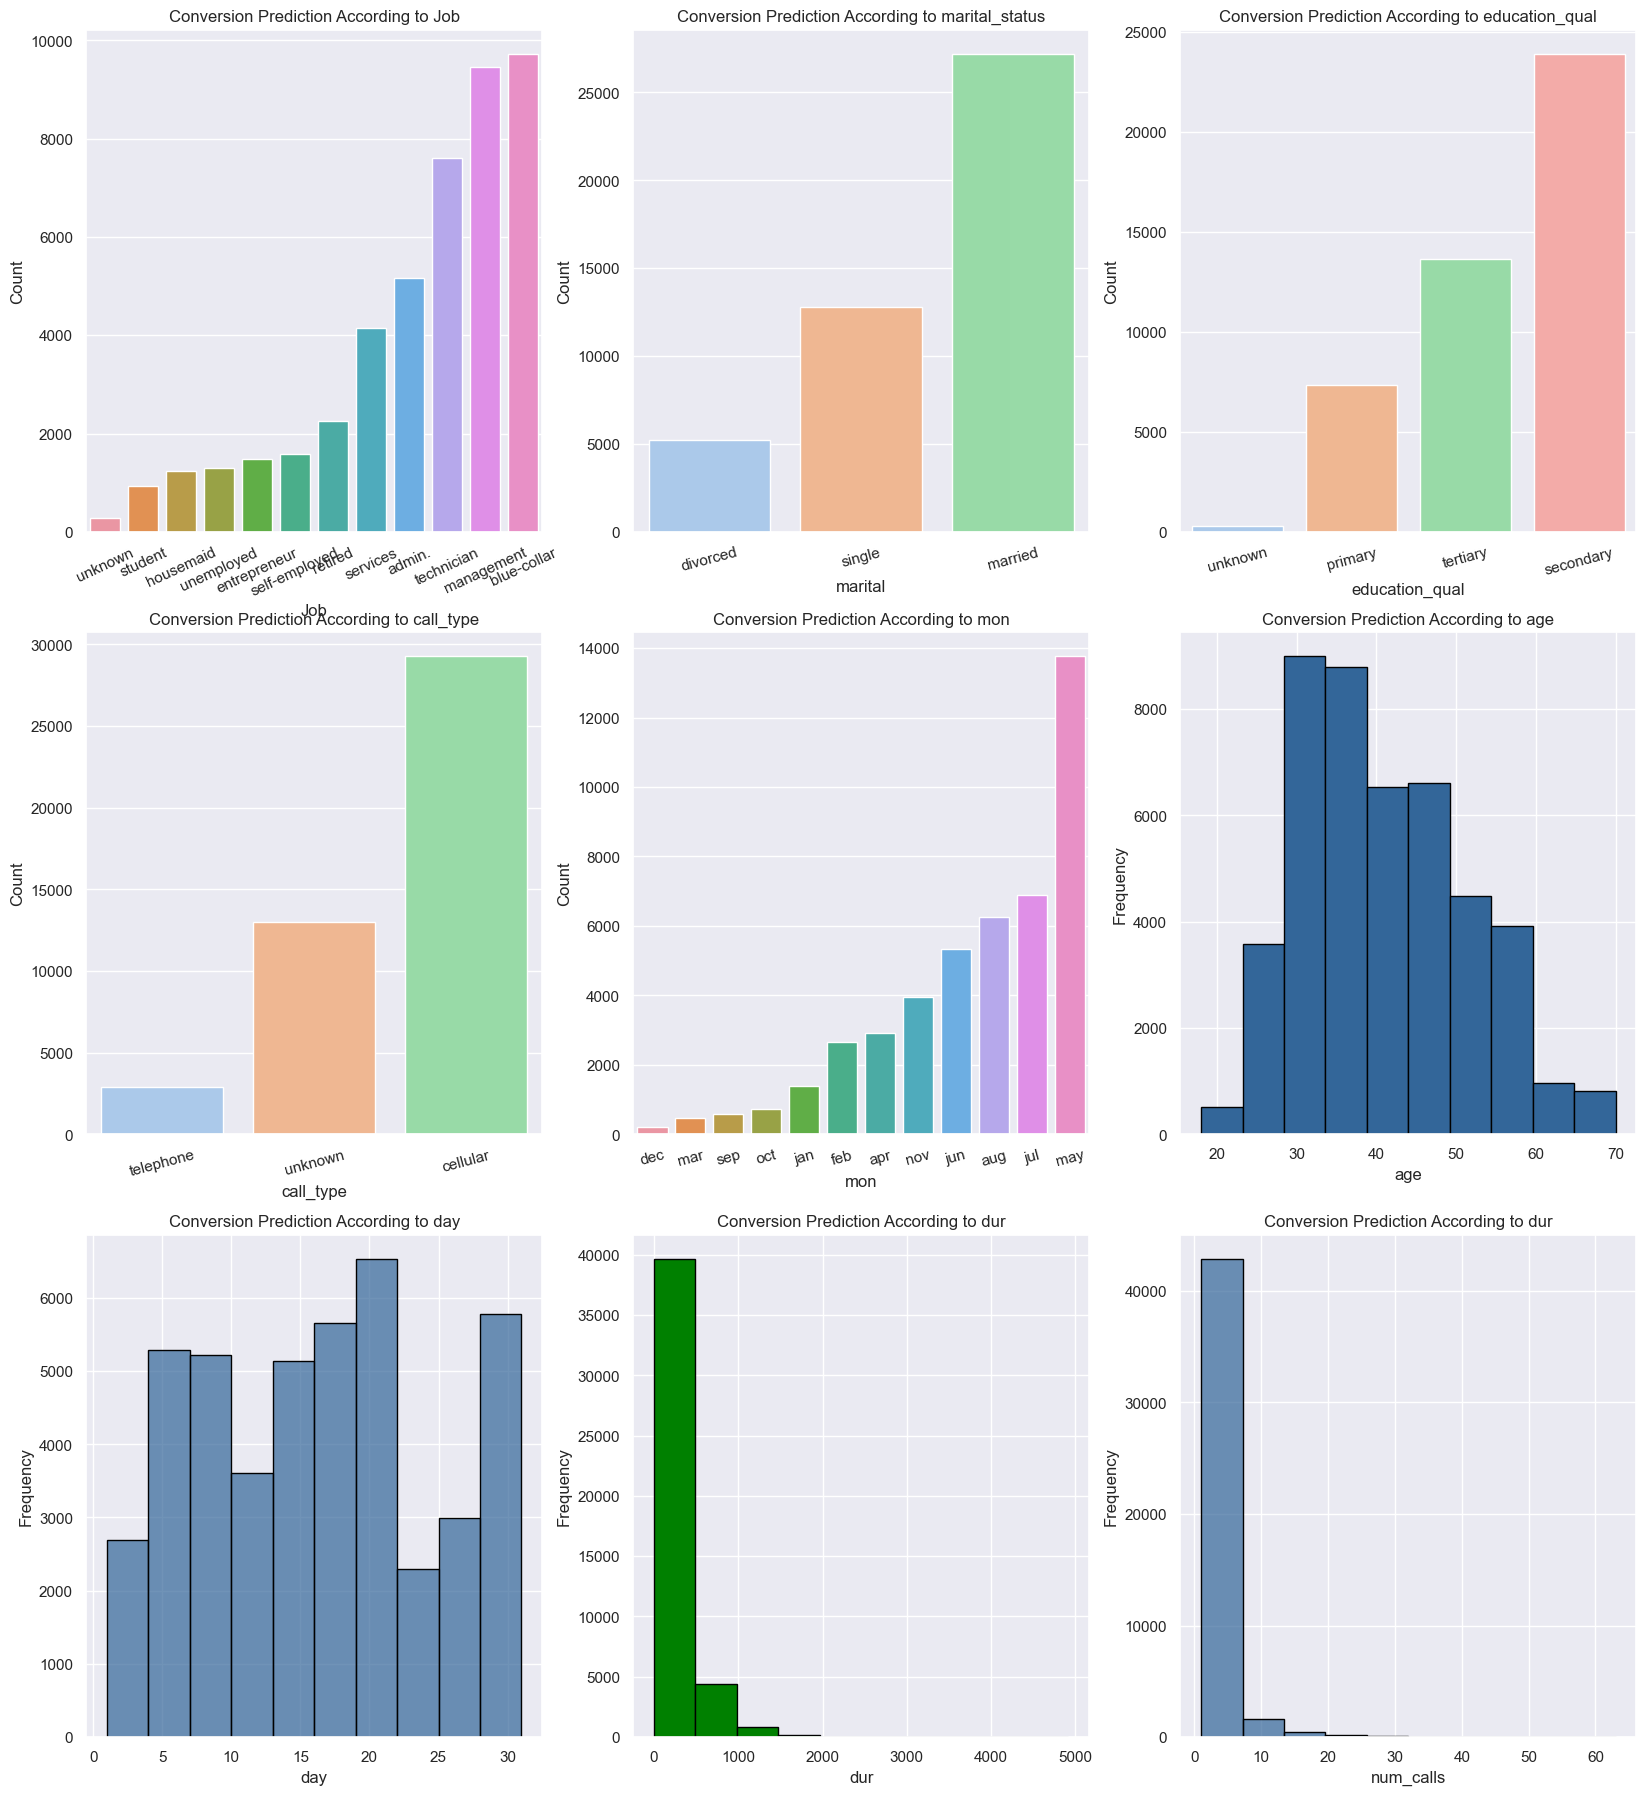

In [58]:
#plotting count plots for all the categorical columns
import seaborn as sns
import matplotlib.pyplot as plt


# Set Seaborn theme and palette
sns.set_theme(style='darkgrid', palette='pastel')

# Create a figure with a subplot
plt.figure(figsize=(20, 30))
plt.subplot(431)

# Create the count plot
sns.countplot(data=df, x='job', order=df['job'].value_counts().index[::-1])

# Customize the plot
plt.xticks(rotation=25)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Conversion Prediction According to Job')


plt.subplot(432)
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Conversion Prediction According to marital_status')

plt.subplot(433)
sns.countplot(data=df, x='education_qual', order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('Conversion Prediction According to education_qual')


plt.subplot(434)
sns.countplot(data=df, x='call_type', order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('Conversion Prediction According to call_type')

plt.subplot(435)
sns.countplot(data=df, x='mon', order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('Conversion Prediction According to mon')

# plt.figure(figsize=(20, 30))
plt.subplot(436)

# Assuming you have a list or array of continuous data 'data'
plt.hist(df['age'], color=(0.2, 0.4, 0.6), edgecolor='black',bins=10)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Conversion Prediction According to age')

plt.subplot(437)

# Assuming you have a list or array of continuous data 'data'
plt.hist(df['day'],bins=10, color=(0.2, 0.4, 0.6, 0.7), edgecolor='black')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.title('Conversion Prediction According to day')

plt.subplot(438)

# Assuming you have a list or array of continuous data 'data'
plt.hist(df['dur'],bins=10, color='green', edgecolor='black')
plt.xlabel('dur')
plt.ylabel('Frequency')
plt.title('Conversion Prediction According to dur')

plt.subplot(439)
# Assuming you have a list or array of continuous data 'data'
plt.hist(df['num_calls'],bins=10, color=(0.2, 0.4, 0.6, 0.7), edgecolor='black')
plt.xlabel('num_calls')
plt.ylabel('Frequency')
plt.title('Conversion Prediction According to dur')


# Show the plot
plt.show()


Interpretations :
 1.) According to the column "job" the highest number of customer covertion in the job of 'bue_collar'and 'management'.
 2.) According to the column "matrial" the 'married' cuustomers are gaves more convertion.
 3.)  According to the column "education_qual" the highest number of customer covertion in the 'seconday'leveal educated people.
 4.) According to the column "call_type "the highest number of customer covertion happens in the ' cellular' way communication.
 5.) According to the column "mon " , in 'may' the highest number of customer covertion in the month of 'may'.
 6.)According to the column "age " highest target lies between 30 to 4o yrs and least target between below 20 and above 60
 7.) According to the column "day " mid of the month(15 to 22) has the hight occurance.
 8.)According to the column "dur "  0-500 sec calls has the hightes occurance.
 9.)According to the column "num_calls " 2 to 8 times of calls has the highset occurance.
  
    

# Features vs Target 


# Target- two binary calss -catagorical

In [59]:
#apply label encoding

In [60]:

df['target'] = df["y"].map({"yes":1 , "no": 0})

In [61]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,no,0
3,47,blue-collar,married,primary,unknown,5,may,92,1,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,no,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,yes,1
45207,70,retired,divorced,primary,cellular,17,nov,456,2,yes,1
45208,70,retired,married,secondary,cellular,17,nov,1127,5,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,no,0


In [62]:
df['target'].unique()

array([0, 1], dtype=int64)

In [63]:
df.drop('y', axis=1, inplace=True)

# catagorical features variable  vs  target catagorical variable

In [65]:
#orders for all the barplots in ascending 
# Calculate the mean conversion rate for each 'job' category and sort by mean conversion rate in ascending order
job_order = df.groupby('job')['target'].mean().reset_index().sort_values('target')['job']
martial_order=df.groupby('marital')['target'].mean().reset_index().sort_values('target')['marital']
education_qual_order=df.groupby('education_qual')['target'].mean().reset_index().sort_values('target')['education_qual']
call_type_order=df.groupby('call_type')['target'].mean().reset_index().sort_values('target')['call_type']
mon_order=df.groupby('mon')['target'].mean().reset_index().sort_values('target')['mon']


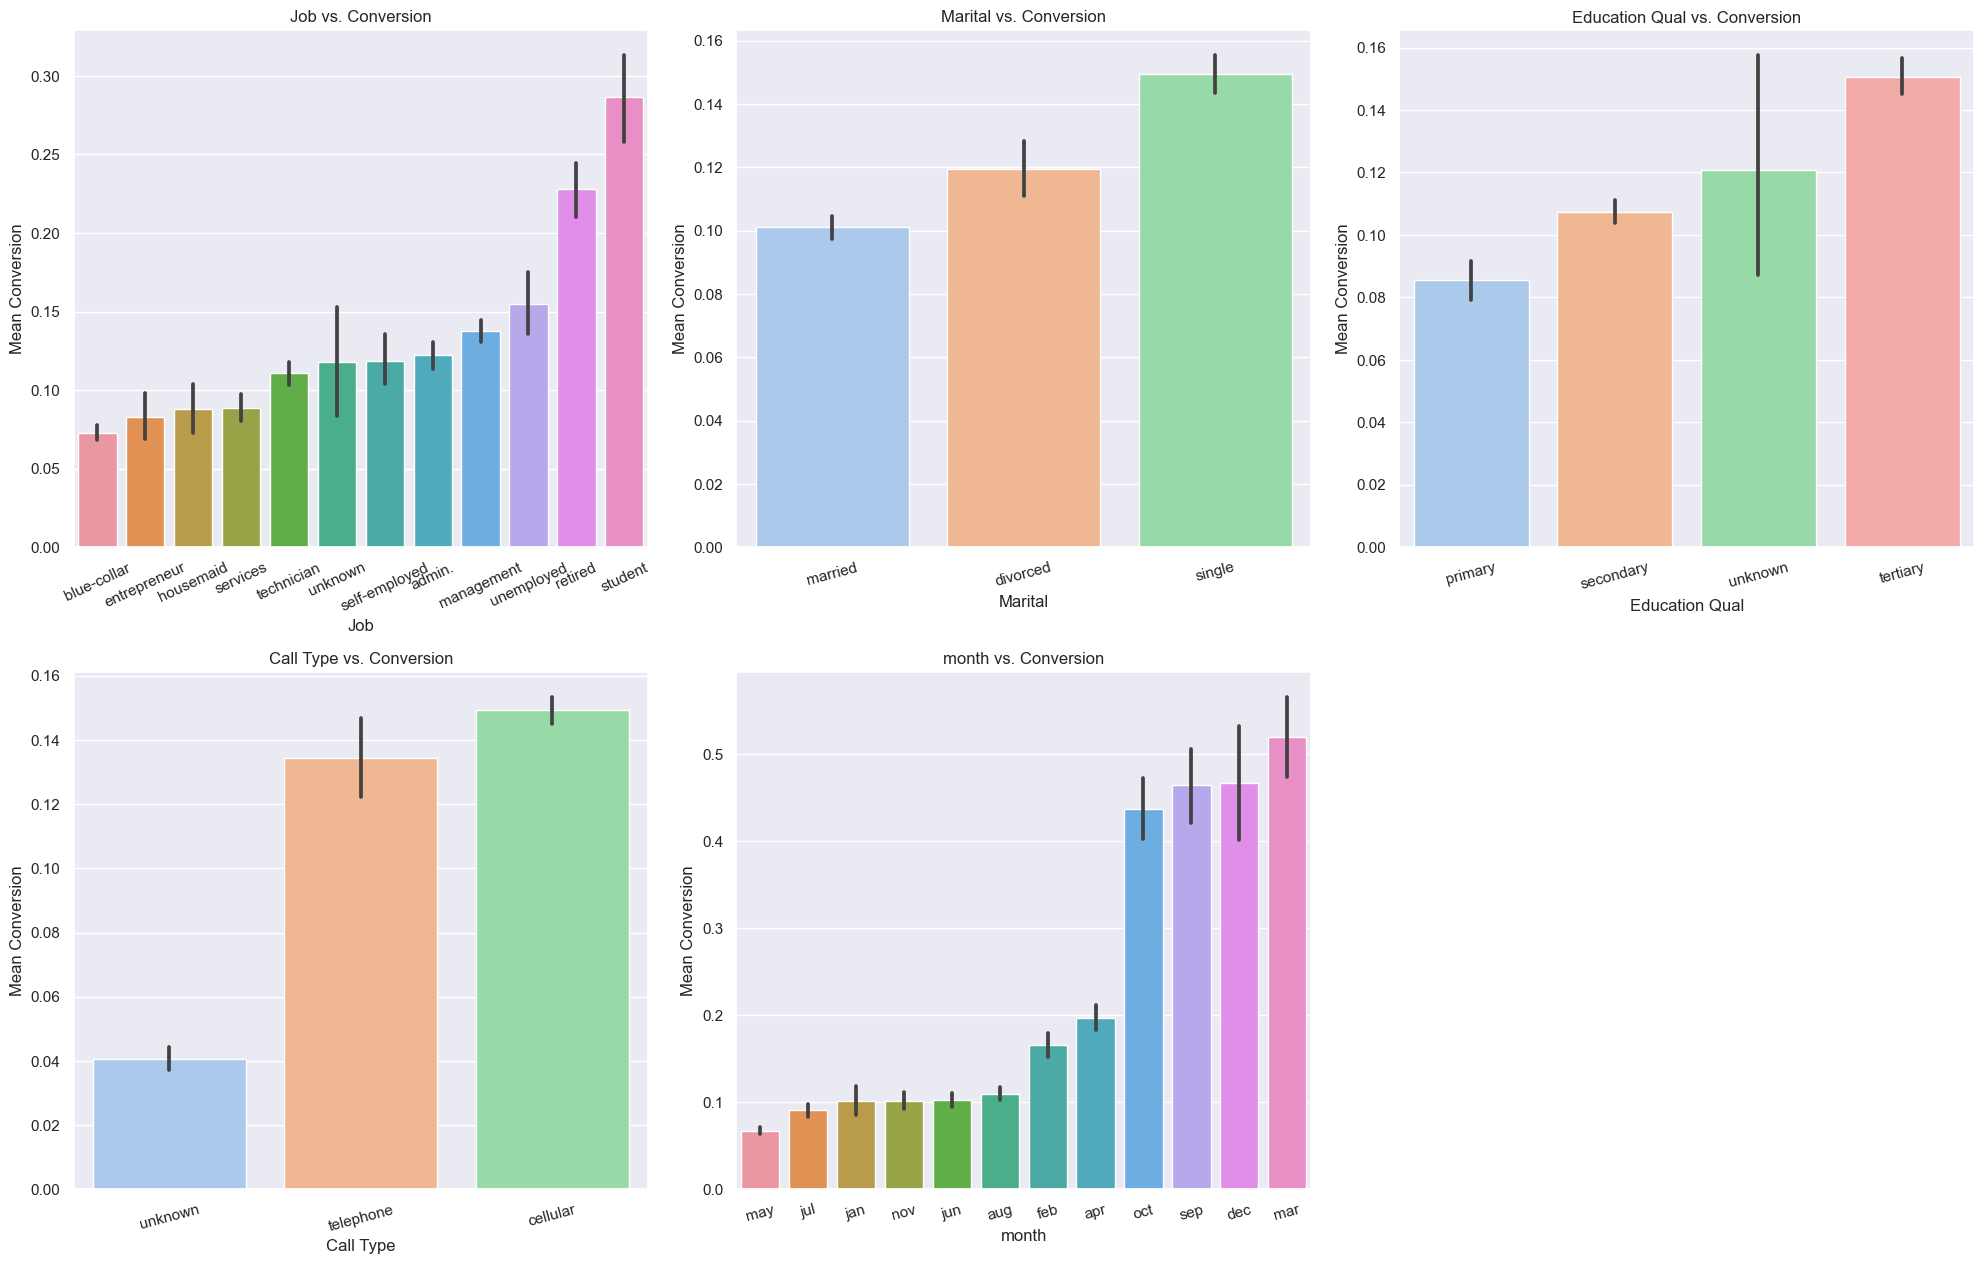

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(20, 25))

# Subplot 1: Job vs. Conversion
plt.subplot(431)
sns.barplot(x='job', y='target', data=df, order=job_order)
plt.xticks(rotation=25)
plt.xlabel('Job')
plt.ylabel('Mean Conversion')
plt.title('Job vs. Conversion')

# Subplot 2: Marital vs. Conversion
plt.subplot(432)
sns.barplot(x='marital', y='target', data=df, order= martial_order)
plt.xticks(rotation=15)
plt.xlabel('Marital')
plt.ylabel('Mean Conversion')
plt.title('Marital vs. Conversion')

# Subplot 3: Education Qual vs. Conversion
plt.subplot(433)
sns.barplot(x='education_qual', y='target', data=df, order=education_qual_order)
plt.xticks(rotation=15)
plt.xlabel('Education Qual')
plt.ylabel('Mean Conversion')
plt.title('Education Qual vs. Conversion')

# Subplot 4: Call Type vs. Conversion
plt.subplot(434)
sns.barplot(x='call_type', y='target', data=df, order=call_type_order)
plt.xticks(rotation=15)
plt.xlabel('Call Type')
plt.ylabel('Mean Conversion')
plt.title('Call Type vs. Conversion')

# Subplot 5: mon vs. Conversion
plt.subplot(435)
sns.barplot(x='mon', y='target', data=df, order=mon_order)
plt.xticks(rotation=15)
plt.xlabel('month')
plt.ylabel('Mean Conversion')
plt.title('month vs. Conversion')



plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


Interpretations :
 managemnet, retired,student has more converation
 single pepeole has max convertaion
 tertiary people has max convertaion
 throgh cellular calls has the max converstion
 in the month of oct,sep,dec,mar has the max convertaion

# Numerical Variable vs Target -- Age, Day, Duration, No of Calls

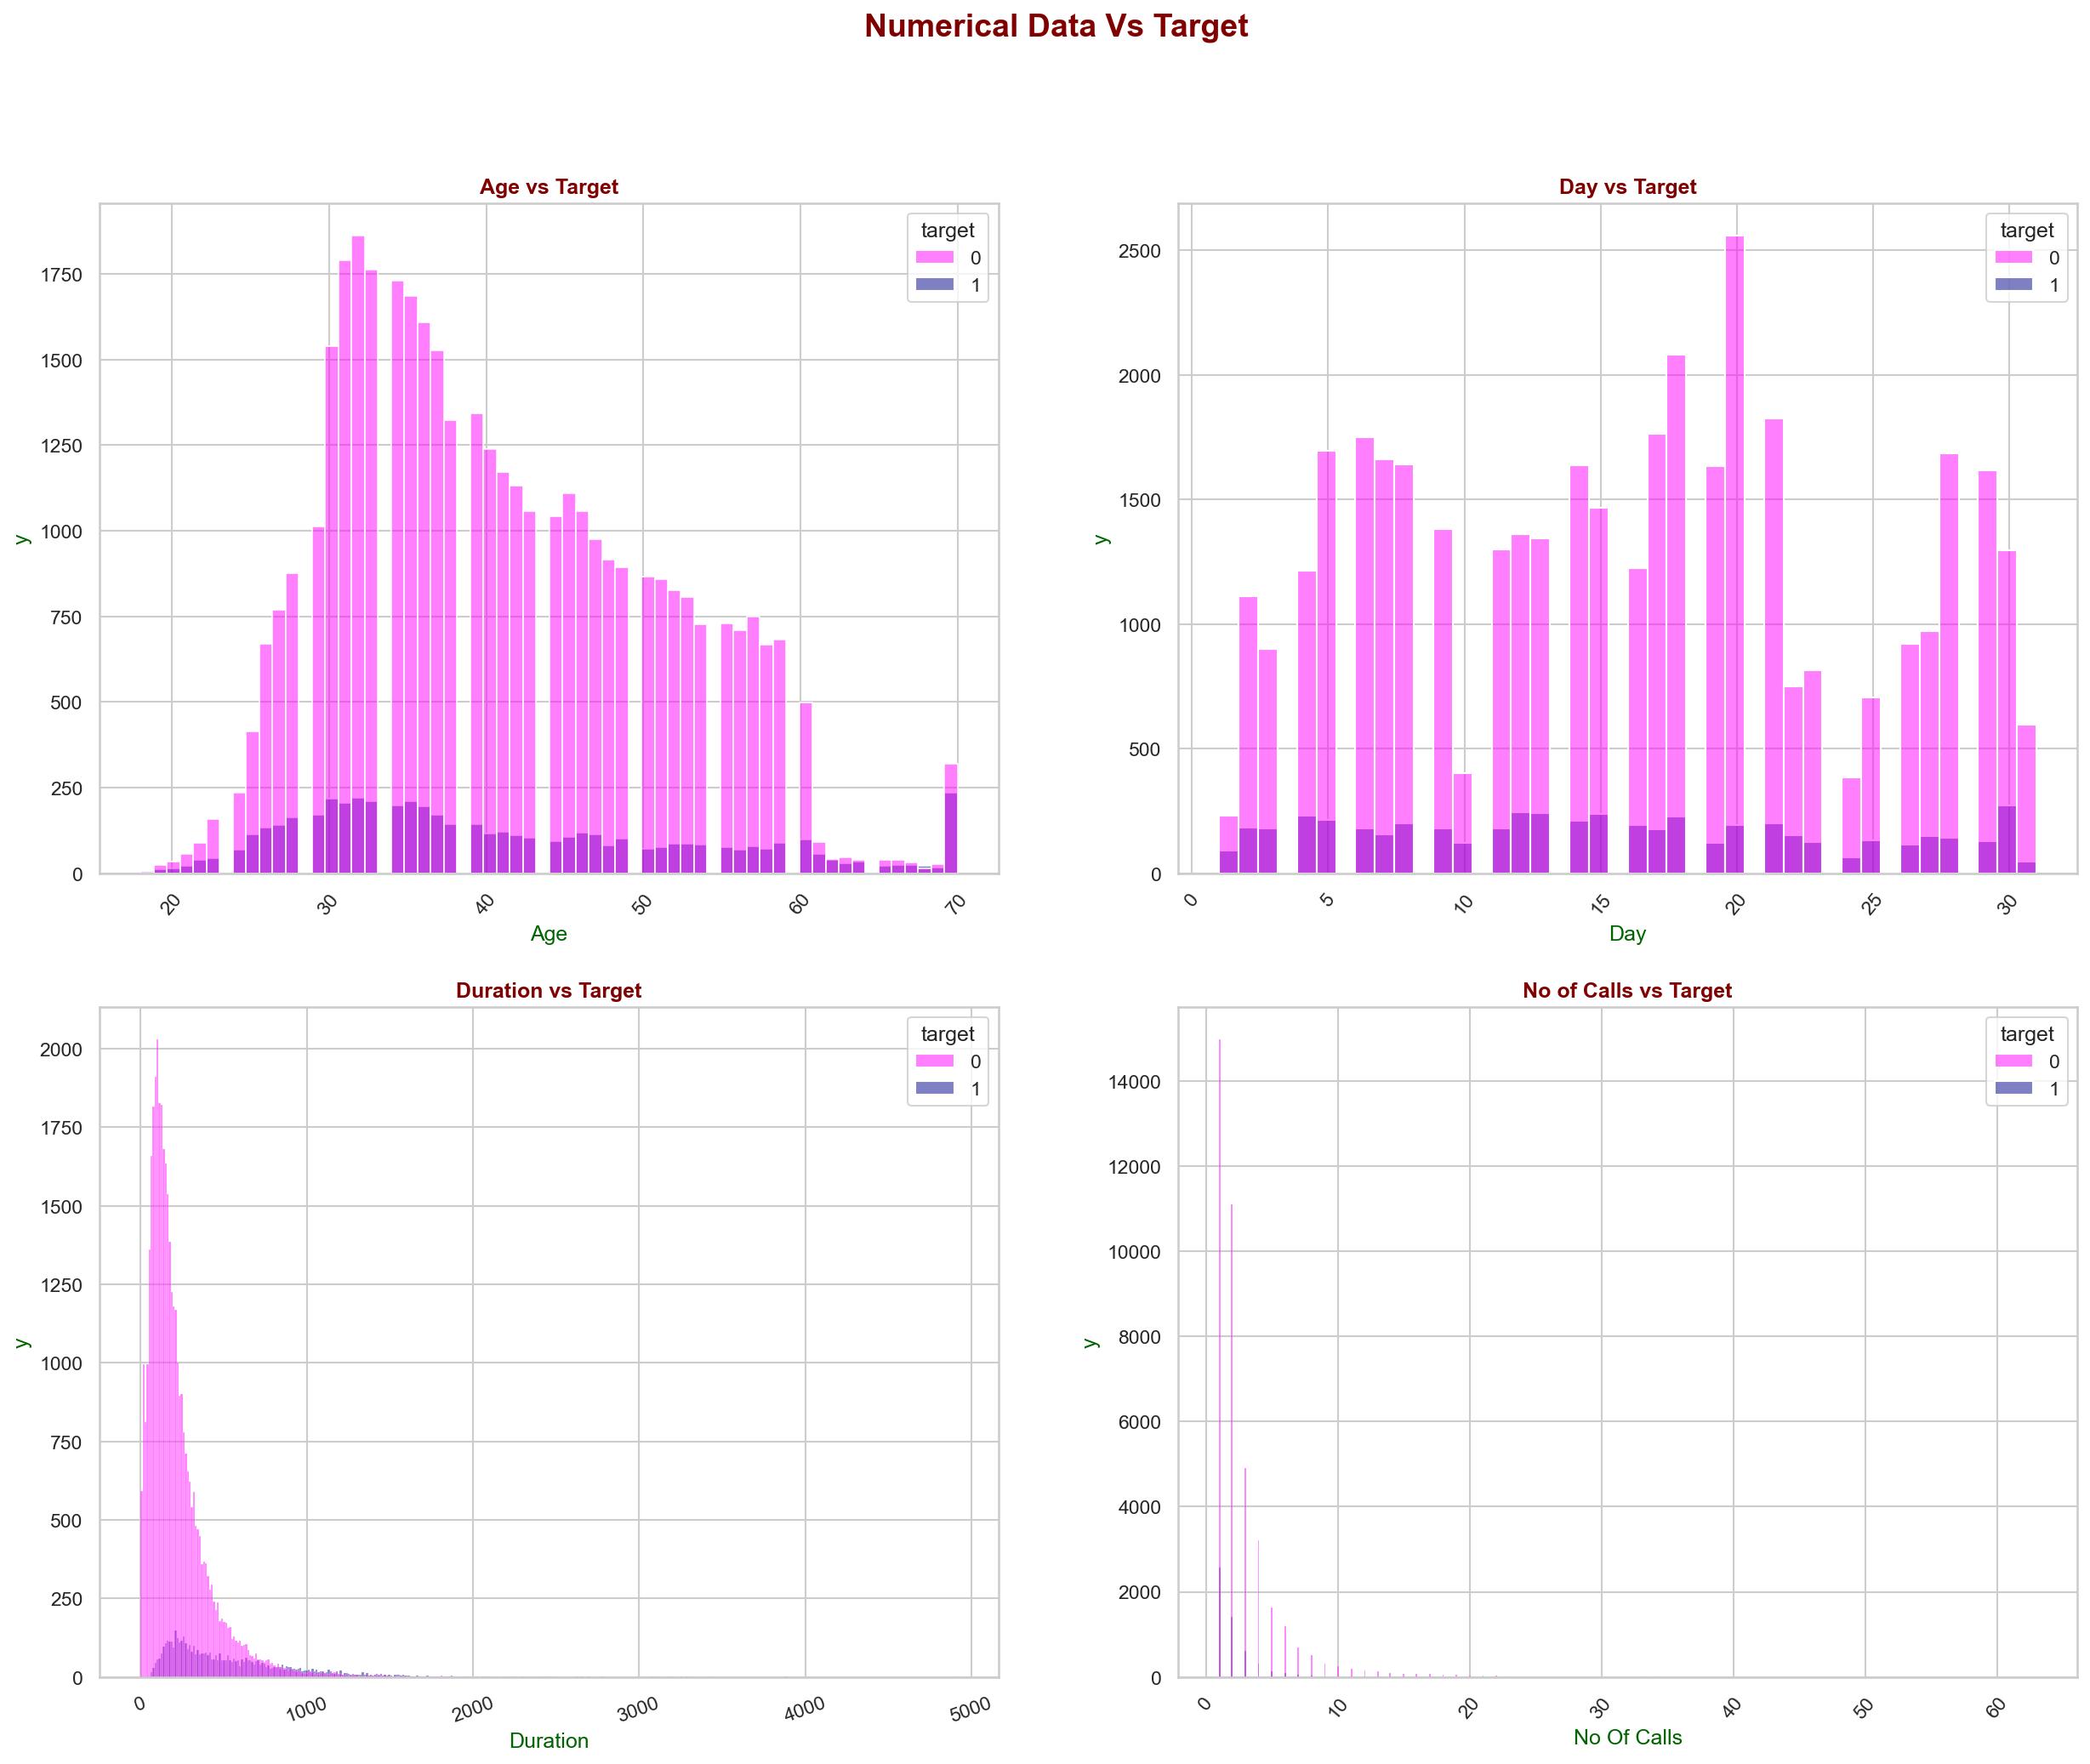

In [168]:
plt.figure(figsize=(20, 15), dpi=150)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='age',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Age', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


#Day vs Target
plt.subplot(2,2,2)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='day',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')


#Duration vs Target
plt.subplot(2,2,3)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='dur',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=20)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#No of Calls vs Target
plt.subplot(2,2,4)
my_colors = ['Magenta', 'DarkBlue']
sns.histplot(x='num_calls',hue='target',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


Interpretations :
   In the age of 30 to 40 people gave the more convertaion
   In the month end call converation is high
   between 200 to 300 sec duration calls have the max converation.
   2 to 6 no.of calls have the maximm converstaion.
   

In [69]:
# check for linear dicision boundary between features

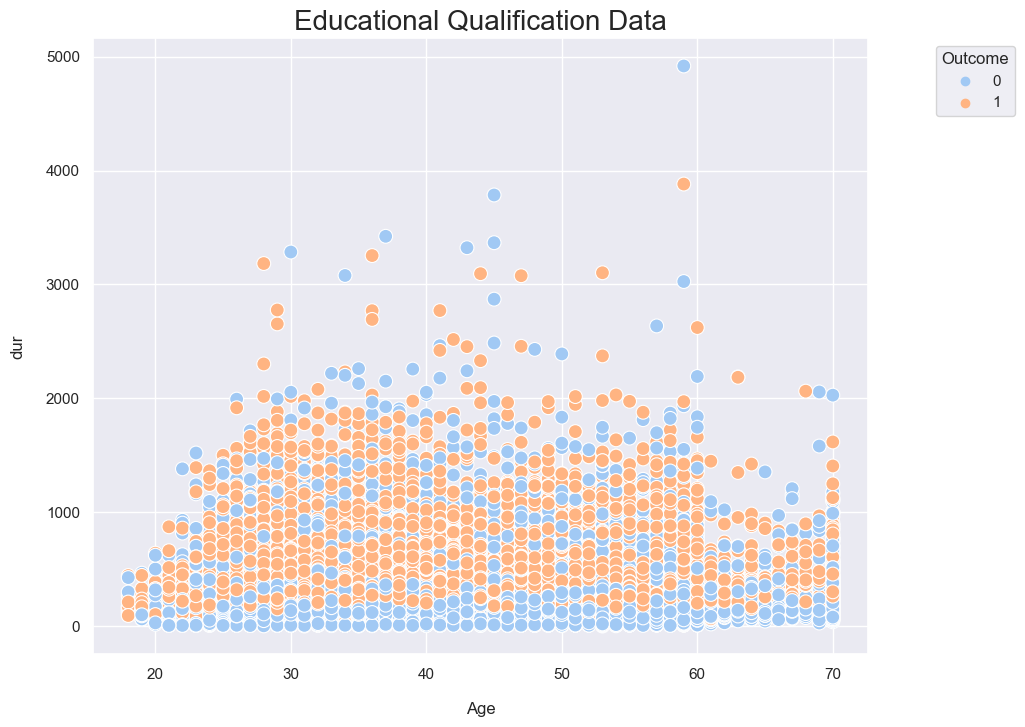

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='dur', hue='target', data=df, s=100)  # Reduce the marker size for better clarity
plt.title("Educational Qualification Data", fontsize=20)  # Adjusted the title and removed the 'y' parameter
plt.xlabel("Age", labelpad=15)  # Increased labelpad for better spacing
plt.ylabel("dur", labelpad=15)
ax = plt.gca()

# Optionally, you can add a legend outside the plot
plt.legend(title='Outcome', title_fontsize=12, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


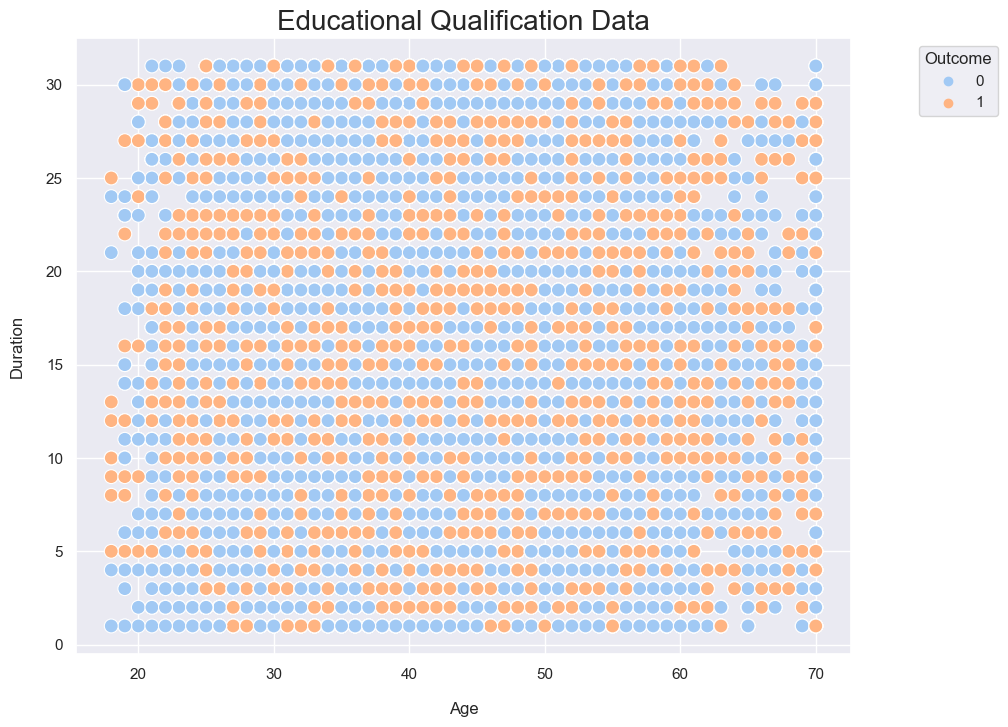

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='day', hue='target', data=df, s=100)  # Reduce the marker size for better clarity
plt.title("Educational Qualification Data", fontsize=20)  # Adjusted the title and removed the 'y' parameter
plt.xlabel("Age", labelpad=15)  # Increased labelpad for better spacing
plt.ylabel("Duration", labelpad=15)
ax = plt.gca()

# Optionally, you can add a legend outside the plot
plt.legend(title='Outcome', title_fontsize=12, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


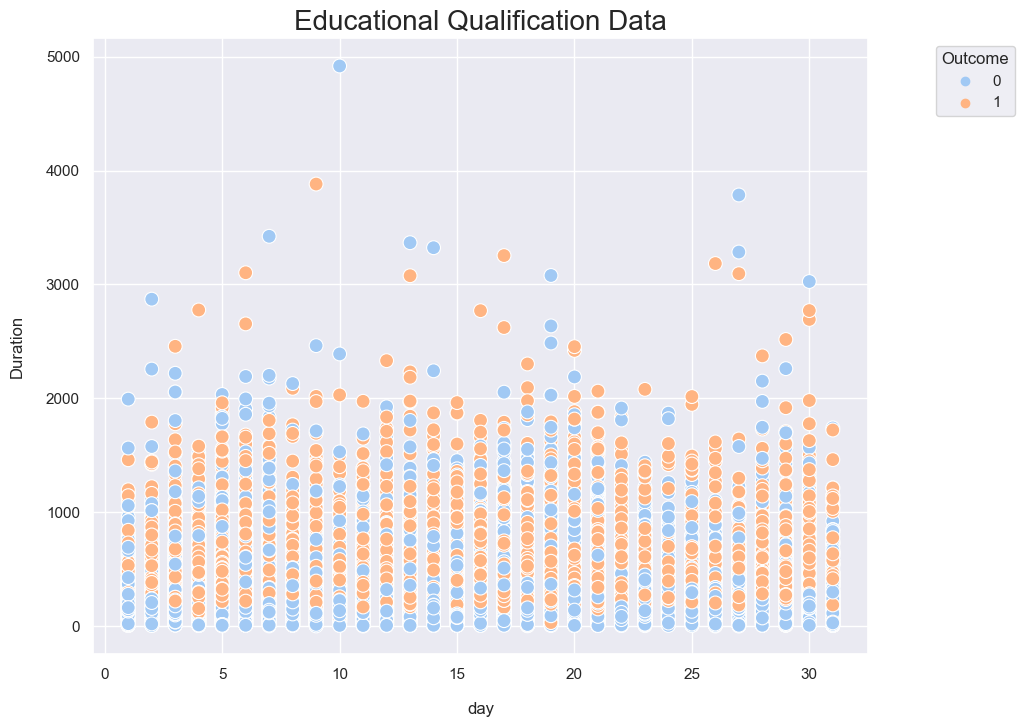

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='day', y='dur', hue='target', data=df, s=100)  # Reduce the marker size for better clarity
plt.title("Educational Qualification Data", fontsize=20)  # Adjusted the title and removed the 'y' parameter
plt.xlabel("day", labelpad=15)  # Increased labelpad for better spacing
plt.ylabel("Duration", labelpad=15)
ax = plt.gca()

# Optionally, you can add a legend outside the plot
plt.legend(title='Outcome', title_fontsize=12, loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


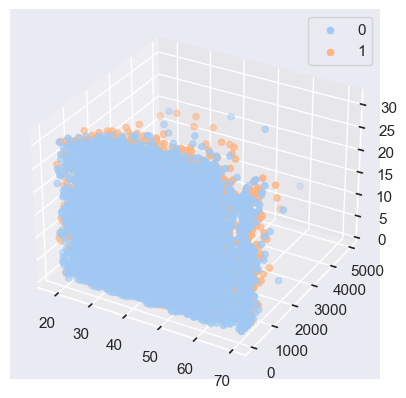

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.target.unique():
    ax.scatter(df.age[df.target == s], df.dur[df.target == s], df['day'][df.target == s], label=s)

ax.legend()
plt.show()


Interpretaion:
there is no clear linear decision boundary.so cant use logistic regression. lets move to non-linear boundary decision algorithums

# Encoding

i'm going to use labe encoding for catagorical datas as per the order of plots.

In [74]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon']

In [75]:
#Encoding for job column (Label Encoding)
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'housemaid':3,'services':4,'technician':5,'unknown':6,'self-employed':7,'admin.':8,'management':9, 'unemployed':10, 'retired': 11, 'student' : 12})   
df['marital']=df['marital'].map({'married':1,'divorced':2,'single':3})
df['education_qual']=df['education_qual'].map({'primary':1,'secondary':2,'unknown':3,'tertiary':4})
df['call_type']=df['call_type'].map({'unknown':1,'telephone':2,'cellular':3})
df['mon']=df['mon'].map({'may':1,'jul':2,'jan':3,'nov':4,'jun':5,'aug':6,'feb':7,'apr':8,'oct':9,'sep':10,'dec':11,'mar':12})
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,target
0,58,9,1,4,1,5,1,261,1,0
1,44,5,3,2,1,5,1,151,1,0
2,33,2,1,2,1,5,1,76,1,0
3,47,1,1,1,1,5,1,92,1,0
4,33,6,3,3,1,5,1,198,1,0


# checking for imbalnce data

In [77]:
#way1:
df['target'].value_counts()

0    39916
1     5289
Name: target, dtype: int64

In [78]:
#way2
#Finding the percentage of the data
print('Percentage for "0": ',((39916) / (45205)) * 100 )
print('Percentage for "1": ',((5289) / (45205)) * 100 )


Percentage for "0":  88.29996681782988
Percentage for "1":  11.700033182170113


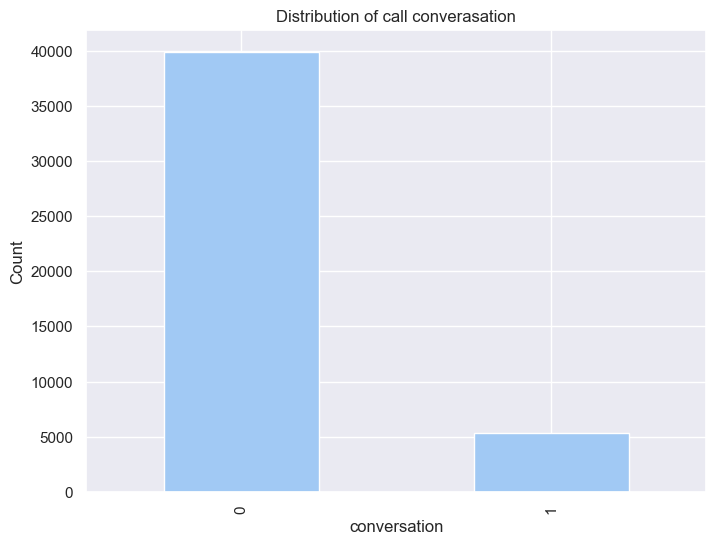

In [79]:
#way3
import matplotlib.pyplot as plt

# Plot the distribution of weather conditions
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of call converasation')
plt.xlabel('conversation')
plt.ylabel('Count')
plt.show()

from the above 3 results ,we can clearly understand that the percentage for no is very high so the Majority class "no" with 88.29% and Minority class "yes" with 11.7%

# spliting

In [81]:
#creating a function which will take the whole dataframe as input and return 2 dataframes, one containing input variables and the other
# holding the target variable

def split(df):
    x = df.drop('target',axis=1)
    y = df['target']
    return x,y

In [82]:
x,y=split(df)


In [83]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls
0,58,9,1,4,1,5,1,261,1
1,44,5,3,2,1,5,1,151,1
2,33,2,1,2,1,5,1,76,1
3,47,1,1,1,1,5,1,92,1
4,33,6,3,3,1,5,1,198,1
...,...,...,...,...,...,...,...,...,...
45206,51,5,1,4,3,17,4,977,3
45207,70,11,2,1,3,17,4,456,2
45208,70,11,1,2,3,17,4,1127,5
45209,57,1,1,2,2,17,4,508,4


In [84]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45205, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Balancing

In [86]:
# Balance the training data using SMOTEENN
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)


In [87]:
x_train_smt.shape


(53521, 9)

In [88]:
y_train_smt.shape

(53521,)

# scaling

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Modeling

# LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_scaled, y_train_smt)
y_pred = logistic_model.predict(x_test_scaled)
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [97]:
logistic_model.coef_

array([[-0.14477787,  0.51226274, -0.04442397, -0.04414102,  0.54393702,
        -0.09762112,  1.10897494,  4.04861447, -1.01580651]])

In [98]:
logistic_model.intercept_


array([1.20300485])

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score

# accuracy_score(y_test, y_pred)
# confusion_matrix(y_test, y_pred)
print('f1_score',f1_score(y_test, y_pred))
print('Auroc value',roc_auc_score(y_test, y_prob))



f1_score 0.4990969295605057
Auroc value 0.8850306107212185


# K-Nearest Neighbour (KNN)

In [91]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))


K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8618519288123991
K value : 2 Train Score :  0.9835391715401431 Cross Value Accuracy : 0.8793277269838166
K value : 3 Train Score :  0.9705349302143084 Cross Value Accuracy : 0.8734652618197819
K value : 4 Train Score :  0.9664243941630388 Cross Value Accuracy : 0.8789953796509069
K value : 5 Train Score :  0.959230956073317 Cross Value Accuracy : 0.8787751185645138
K value : 6 Train Score :  0.9573438463406887 Cross Value Accuracy : 0.8784424045372317
K value : 7 Train Score :  0.9529156779581847 Cross Value Accuracy : 0.8795482325331246
K value : 8 Train Score :  0.9501877767605239 Cross Value Accuracy : 0.8797699603970079
K value : 9 Train Score :  0.9475906653463126 Cross Value Accuracy : 0.8806545494548477
K value : 10 Train Score :  0.9455167130658994 Cross Value Accuracy : 0.8802125605045715
K value : 20 Train Score :  0.9298779918162964 Cross Value Accuracy : 0.8809864078619272
K value : 30 Train Score :  0.9222548158666691

k=40 is a good cross validation accuracy of 0.882

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

# Create a KNN model with a specified number of neighbors (e.g., k=40)
knn_model = KNeighborsClassifier(n_neighbors=40)
knn_model.fit(x_train_scaled, y_train_smt)

# Evaluate the KNN model's accuracy
knn_score = knn_model.score(x_test_scaled,y_test)
print("KNN Score: ", knn_score)

# Calculate the ROC AUC score using predicted probabilities
y_pred_prob = knn_model.predict_proba(x_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUROC on the sampled dataset: ", roc_auc)


KNN Score:  0.7971463333702025
AUROC on the sampled dataset:  0.8850306107212185


# Decision Tree 

In [120]:
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(depth) # will tell the DT to not grow past the given threhsold
    dt.fit(x_train_smt, y_train_smt) # the model is trained
    trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(cross_val_score(dt, x_test_scaled, y_test, cv=10)))

     

Depth  :  1  Training Accuracy :  0.7887558154742998  Cross val score :  0.8798805798660343
Depth  :  2  Training Accuracy :  0.807178490685899  Cross val score :  0.879328338141104
Depth  :  3  Training Accuracy :  0.8552343939761963  Cross val score :  0.8839738669143891
Depth  :  4  Training Accuracy :  0.8579809794286355  Cross val score :  0.8877338287781743
Depth  :  5  Training Accuracy :  0.8841949888828684  Cross val score :  0.888065687185254
Depth  :  6  Training Accuracy :  0.8955550157881953  Cross val score :  0.8883971788979611
Depth  :  7  Training Accuracy :  0.9024121372919041  Cross val score :  0.8855209504718135
Depth  :  8  Training Accuracy :  0.9156966424394163  Cross val score :  0.8859642839681221
Depth  :  9  Training Accuracy :  0.9253937706694568  Cross val score :  0.8822028553268471
Depth  :  10  Training Accuracy :  0.9315595747463612  Cross val score :  0.8787749963330562
Depth  :  20  Training Accuracy :  0.9985426281272771  Cross val score :  0.853668

depth= 6 is the good cross validation score of 0.88839

In [133]:
from sklearn.metrics import accuracy_score, roc_auc_score

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(x_train_smt, y_train_smt)

print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.8955550157881953
AUROC on the sampled dataset :  0.8685799959023652


# XG Boost


In [123]:
pip install xgboost


     ---------------------------------------- 99.7/99.7 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [151]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

for lr in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.5, 0.7, 1]:
    model = xgb.XGBClassifier(learning_rate=lr)
    model.fit(x_train_smt, y_train_smt) 
    trainAccuracy = accuracy_score(y_train_smt, model.predict(x_train_smt))
    print("Learning rate  : ", lr, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(cross_val_score(model, x_test_scaled, y_test, cv=10)))

   

Learning rate  :  0.01  Training Accuracy :  0.9093439958147269  Cross val score :  0.8806545494548477
Learning rate  :  0.02  Training Accuracy :  0.9210029707965098  Cross val score :  0.8866275118564513
Learning rate  :  0.03  Training Accuracy :  0.9274490386950917  Cross val score :  0.8886189067618442
Learning rate  :  0.04  Training Accuracy :  0.9349227406064909  Cross val score :  0.8893936097394025
Learning rate  :  0.05  Training Accuracy :  0.9405653855495973  Cross val score :  0.8914947684936194
Learning rate  :  0.1  Training Accuracy :  0.954541208123914  Cross val score :  0.8951441108883783
Learning rate  :  0.11  Training Accuracy :  0.9569888454998973  Cross val score :  0.8927118271158264
Learning rate  :  0.12  Training Accuracy :  0.9574372676145811  Cross val score :  0.8940391385126875
Learning rate  :  0.13  Training Accuracy :  0.959044113525532  Cross val score :  0.894812619175671
Learning rate  :  0.14  Training Accuracy :  0.9611367500607239  Cross val sc

In [ ]:
lr= 0.1 is the good cross validation score of 0.8951

In [152]:
from sklearn.metrics import accuracy_score, roc_auc_score

xgb_classifier = xgb.XGBClassifier(learning_rate=0.1)  # Specify the learning rate as 0.1
xgb_classifier.fit(x_train_smt, y_train_smt)

print("XGBoost Score : ", xgb_classifier.score(x_train_smt, y_train_smt))
print("AUROC on the sampled dataset: ", roc_auc_score(y_test, xgb_classifier.predict_proba(x_test)[:, 1]))


XGBoost Score :  0.954541208123914
AUROC on the sampled dataset:  0.9109137725673768


# Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 

for depth in [1,2,3,4,5,6,7,8,9,10,15,20]:
    rf= RandomForestClassifier(max_depth=depth)  
 
    rf.fit(x_train, y_train) # the model is trained
    trainAccuracy = accuracy_score(y_train_smt, rf.predict(x_train_smt)) 
    valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) 
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.431400758580744  Cross val score :  0.883779460805782
Depth  :  2  Training Accuracy :  0.431400758580744  Cross val score :  0.883779460805782
Depth  :  3  Training Accuracy :  0.43295155172735933  Cross val score :  0.8843877990732064
Depth  :  4  Training Accuracy :  0.4437323667345528  Cross val score :  0.8861851742998279
Depth  :  5  Training Accuracy :  0.4991124978980213  Cross val score :  0.8934576398080841
Depth  :  6  Training Accuracy :  0.5578557949216195  Cross val score :  0.8967205089168406
Depth  :  7  Training Accuracy :  0.5704489826423274  Cross val score :  0.8979370095982343
Depth  :  8  Training Accuracy :  0.5924216662618411  Cross val score :  0.899015404150998
Depth  :  9  Training Accuracy :  0.6172343566076867  Cross val score :  0.899817349426626
Depth  :  10  Training Accuracy :  0.6320509706470357  Cross val score :  0.9005361848302387
Depth  :  15  Training Accuracy :  0.720539601278003  Cross val score :  0.899983324

In [ ]:
Depth = 10 is giving the good cross validation score fo 0.9005

In [156]:
from sklearn.metrics import accuracy_score, roc_auc_score

rf_classifier = RandomForestClassifier(max_depth=10,n_estimators=100,max_features="sqrt") 

rf_classifier.fit(x_train_smt, y_train_smt)
                  
print("Random Forest Score : ", rf_classifier.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, rf_classifier.predict_proba(x_test)[:, 1]))                

Random Forest Score :  0.9442648679957399
AUROC on the sampled dataset :  0.9000392400623674


# Solution Statement

Models are tested, below are the AUROC value of each model

. Logistic Regression - AUROC Score is 0.87
. KNN - AUROC Score is 0.88
. Decision Tree - AUROC Score is 0.86
. XG Boost - AUROC Score is 0.9
. Random Forest - AUROC Score is 0.89
Hence XG Boost is giving the good AUROC Score of 0.9, so XG Boost is the best model for customer convertion prediction

# Feature Importance

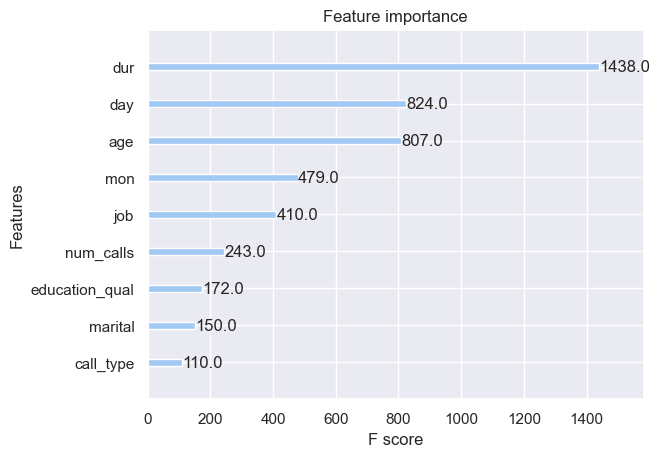

In [157]:

from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()
     

# Conclusion:


Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

The client should focused on the top few features of order given below to have them subscribed to the insurance.

Duration - Longer the call better influncing the clients
Day - People who subscribed to insurance are mostly mid of the month.
age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
Month - In the month of may people subscribed to insurance are more.
Job - In this blue collar people are targeted more but people who subscribed more are from management job.